In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
import xgboost as xgb
import matplotlib.ticker
from sklearn import metrics
from sklearn import preprocessing

matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline
pd.options.display.max_columns = 100

In [113]:
df = pd.read_csv('data/eviction_with_unemployment_education_2005_2016.csv')
df.dropna(how = 'any', inplace = True)
df = df.drop(columns = df.columns[0], axis = 1)
df.reset_index(inplace = True)
df = df.rename(columns = {'name':'county', 'parent_location':'state'})

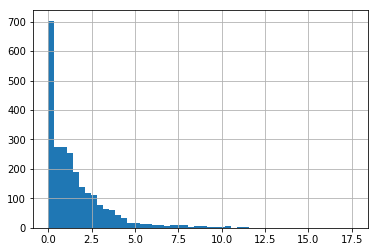

In [114]:
df_16 = df.loc[df.year == 2016, :]
df_16.loc[:,'eviction_rate'].hist(bins = 50)


In [115]:
list(df_16.columns)

['index',
 'geoid',
 'year',
 'county',
 'state',
 'population',
 'poverty_rate',
 'pct_renter_occupied',
 'median_gross_rent',
 'median_household_income',
 'median_property_value',
 'rent_burden',
 'pct_white',
 'pct_af_am',
 'pct_hispanic',
 'pct_am_ind',
 'pct_asian',
 'pct_nh_pi',
 'pct_multiple',
 'pct_other',
 'renter_occupied_households',
 'eviction_filings',
 'evictions',
 'eviction_rate',
 'eviction_filing_rate',
 'imputed',
 'subbed',
 'id2',
 'in_labor_force_pct',
 'employed_pct',
 'unemploy_rate',
 'edu_ratio_less_than_high_school',
 'edu_ratio_high_school',
 'edu_ratio_some_college',
 'edu_ratio_bachelor']

## Poverty, population and Employment

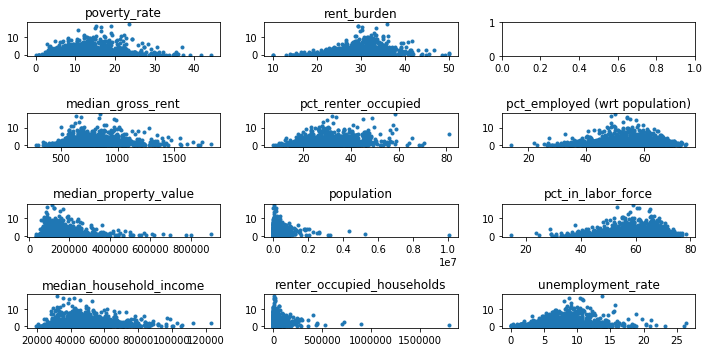

In [201]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4,3, figsize=(10,5))
#poverty and income
ax1.plot(df_16.poverty_rate, df_16.eviction_rate, '.')
ax1.set_title('poverty_rate')

ax4.plot(df_16.median_gross_rent, df_16.eviction_rate, '.')
ax4.set_title('median_gross_rent')

ax7.plot(df_16.median_property_value, df_16.eviction_rate, '.')
ax7.set_title('median_property_value')

ax10.plot(df_16.median_household_income, df_16.eviction_rate, '.')
ax10.set_title('median_household_income')

ax2.plot(df_16.rent_burden, df_16.eviction_rate, '.')
ax2.set_title('rent_burden')

ax5.plot(df_16.pct_renter_occupied, df_16.eviction_rate, '.')
ax5.set_title('pct_renter_occupied')

ax8.plot(df_16.population, df_16.eviction_rate, '.')
ax8.set_title('population')

ax11.plot(df_16.renter_occupied_households, df_16.eviction_rate, '.')
ax11.set_title('renter_occupied_households')


#labor force
ax6.plot(df_16.employed_pct, df_16.eviction_rate, '.')
ax6.set_title('pct_employed (wrt population)')

ax9.plot(df_16.in_labor_force_pct, df_16.eviction_rate, '.')
ax9.set_title('pct_in_labor_force')

ax12.plot(df_16.unemploy_rate, df_16.eviction_rate, '.')
ax12.set_title('unemployment_rate')

plt.tight_layout()


## Race and Rducation

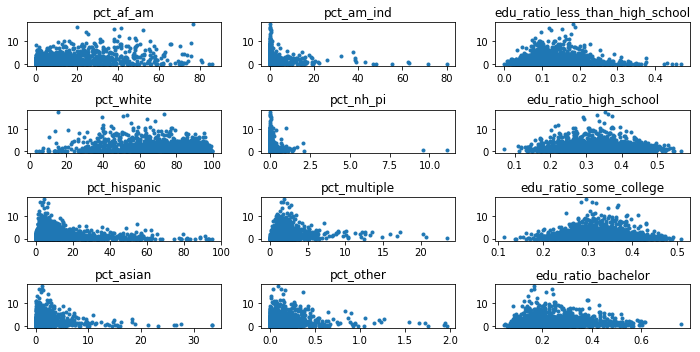

In [199]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4,3, figsize=(10,5))
# races
ax1.plot(df_16.pct_af_am, df_16.eviction_rate, '.')
ax1.set_title('pct_af_am')

ax4.plot(df_16.pct_white, df_16.eviction_rate, '.')
ax4.set_title('pct_white')

ax7.plot(df_16.pct_hispanic, df_16.eviction_rate, '.')
ax7.set_title('pct_hispanic')

ax10.plot(df_16.pct_asian, df_16.eviction_rate, '.')
ax10.set_title('pct_asian')


ax2.plot(df_16.pct_am_ind, df_16.eviction_rate, '.')
ax2.set_title('pct_am_ind')

ax5.plot(df_16.pct_nh_pi, df_16.eviction_rate, '.')
ax5.set_title('pct_nh_pi')

ax8.plot(df_16.pct_multiple, df_16.eviction_rate, '.')
ax8.set_title('pct_multiple')

ax11.plot(df_16.pct_other, df_16.eviction_rate, '.')
ax11.set_title('pct_other')

# education
ax3.plot(df_16.edu_ratio_less_than_high_school, df_16.eviction_rate, '.')
ax3.set_title('edu_ratio_less_than_high_school')

ax6.plot(df_16.edu_ratio_high_school, df_16.eviction_rate, '.')
ax6.set_title('edu_ratio_high_school')

ax9.plot(df_16.edu_ratio_some_college, df_16.eviction_rate, '.')
ax9.set_title('edu_ratio_some_college')

ax12.plot(df_16.edu_ratio_bachelor, df_16.eviction_rate, '.')
ax12.set_title('edu_ratio_bachelor')
plt.tight_layout()


# explore the correlation of features

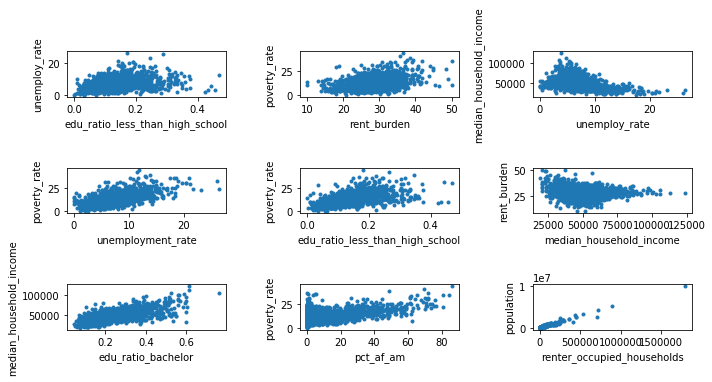

In [229]:

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(10,5))

ax1.plot(df_16.edu_ratio_less_than_high_school, df_16.unemploy_rate, '.')
ax1.set_xlabel('edu_ratio_less_than_high_school')
ax1.set_ylabel('unemploy_rate')

ax4.plot(df_16.unemploy_rate, df_16.poverty_rate, '.')
ax4.set_xlabel('unemployment_rate')
ax4.set_ylabel('poverty_rate')

ax7.plot(df_16.edu_ratio_bachelor, df_16.median_household_income, '.')
ax7.set_xlabel('edu_ratio_bachelor')
ax7.set_ylabel('median_household_income')

#
ax2.plot(df_16.rent_burden, df_16.poverty_rate, '.')
ax2.set_xlabel('rent_burden')
ax2.set_ylabel('poverty_rate')

ax5.plot(df_16.edu_ratio_less_than_high_school, df_16.poverty_rate, '.')
ax5.set_xlabel('edu_ratio_less_than_high_school')
ax5.set_ylabel('poverty_rate')

ax8.plot(df_16.pct_af_am, df_16.poverty_rate, '.')
ax8.set_xlabel('pct_af_am')
ax8.set_ylabel('poverty_rate')

#
ax3.plot(df_16.unemploy_rate, df_16.median_household_income, '.')
ax3.set_xlabel('unemploy_rate')
ax3.set_ylabel('median_household_income')


ax6.plot(df_16.median_household_income, df_16.rent_burden, '.')
ax6.set_xlabel('median_household_income')
ax6.set_ylabel('rent_burden')


ax9.plot(df_16.renter_occupied_households, df_16.population, '.')
ax9.set_xlabel('renter_occupied_households')
ax9.set_ylabel('population')

plt.tight_layout()


In [118]:
df.columns

Index(['index', 'geoid', 'year', 'county', 'state', 'population',
       'poverty_rate', 'pct_renter_occupied', 'median_gross_rent',
       'median_household_income', 'median_property_value', 'rent_burden',
       'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian',
       'pct_nh_pi', 'pct_multiple', 'pct_other', 'renter_occupied_households',
       'eviction_filings', 'evictions', 'eviction_rate',
       'eviction_filing_rate', 'imputed', 'subbed', 'id2',
       'in_labor_force_pct', 'employed_pct', 'unemploy_rate',
       'edu_ratio_less_than_high_school', 'edu_ratio_high_school',
       'edu_ratio_some_college', 'edu_ratio_bachelor'],
      dtype='object')

In [119]:
df_dummy = pd.get_dummies(df[['county','state', 'year']])

In [147]:
df_dummy.head()

,year,county_Abbeville County,county_Acadia Parish,county_Accomack County,county_Ada County,county_Adair County,county_Adams County,county_Addison County,county_Aiken County,county_Aitkin County,county_Alachua County,county_Alamance County,county_Alameda County,county_Alamosa County,county_Albany County,county_Albemarle County,county_Alcona County,county_Alcorn County,county_Alexander County,county_Alexandria city,county_Alfalfa County,county_Alger County,county_Allamakee County,county_Allegan County,county_Allegany County,county_Alleghany County,county_Allegheny County,county_Allen County,county_Allen Parish,county_Allendale County,county_Alpena County,county_Alpine County,county_Amador County,county_Amelia County,county_Amherst County,county_Amite County,county_Anderson County,county_Andrew County,county_Andrews County,county_Androscoggin County,county_Angelina County,county_Anne Arundel County,county_Anoka County,county_Anson County,county_Antelope County,county_Antrim County,county_Apache County,county_Appanoose County,county_Appling County,county_Appomattox County,...,county_Yuba County,county_Zapata County,county_Zavala County,state_Alabama,state_Arizona,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Carolina,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
df.shape

(29841, 35)

In [122]:
# col_list = ['poverty_rate',\
#                                         'median_gross_rent', 'median_household_income',\
#                                         'median_property_value',\
#                                         'pct_renter_occupied', 'rent_burden', 'pct_white', 'pct_af_am',\
#                                         'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple',\
#                                         'pct_other', 'renter_occupied_households', \
#                                         'in_labor_force_pct', 'employed_pct', 'unemploy_rate',\
#                                         'edu_ratio_less_than_high_school', 'edu_ratio_high_school',\
# #                                         'edu_ratio_some_college', 'edu_ratio_bachelor']

# col_list = ['poverty_rate','median_gross_rent', 'median_household_income',\
#                                         'median_property_value',\
#                                         'pct_renter_occupied', 'rent_burden', 'pct_white', 'renter_occupied_households', \
#                                         'in_labor_force_pct', 'employed_pct', 'unemploy_rate',\
#                                         'edu_ratio_less_than_high_school', 'edu_ratio_high_school',\
#                                         'edu_ratio_some_college', 'edu_ratio_bachelor']

In [267]:
col_list = ['poverty_rate','median_gross_rent','median_household_income',\
            'median_property_value','pct_renter_occupied', 'rent_burden',\
            'unemploy_rate', 'in_labor_force_pct', 'employed_pct',\
            'edu_ratio_less_than_high_school', 'edu_ratio_high_school',\
            'edu_ratio_some_college', 'edu_ratio_bachelor',\
            'pct_white', 'pct_af_am','pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi',]

data_norm = preprocessing.normalize(df[col_list], axis = 0)

df_norm = pd.DataFrame(data_norm, columns = col_list)

In [268]:
X = pd.concat([df_norm, df_dummy], axis = 1)
y = df.eviction_rate

In [269]:
X.shape

(29841, 1720)

In [270]:
y.shape

(29841,)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [272]:
#clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-5)
#clf.fit(X_train, y_train)
#clf.score(X_test, y_test)

In [273]:
xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values, y_test.values)
evallist = [(xgtrain, 'train'),(xgtest, 'eval'),]
param = {'silent': 1, 'max_depth': 10, 'eta': 1, 'lambda':10, 'alpha': 10, 'objective': 'reg:linear'}

# Prediction Results

## For comparison: Standard deviation of a variable is basically the RMSE of an OLS model using only the mean as the predictor

In [274]:
y.std()

1.9857669438444097

In [275]:
y_train.std()

1.9802400257171777

In [276]:
y_test.std()

2.0077896433316145

## prediction RMSE of the test set:

In [278]:
num_round = 150
bst = xgb.train(param, xgtrain, num_round, evallist)

[0]	train-rmse:1.23249	eval-rmse:1.32812
[1]	train-rmse:1.03454	eval-rmse:1.1367
[2]	train-rmse:0.965533	eval-rmse:1.08395
[3]	train-rmse:0.908571	eval-rmse:1.04685
[4]	train-rmse:0.872298	eval-rmse:1.02721
[5]	train-rmse:0.839225	eval-rmse:1.00401
[6]	train-rmse:0.795882	eval-rmse:0.981258
[7]	train-rmse:0.757272	eval-rmse:0.961882
[8]	train-rmse:0.719071	eval-rmse:0.939167
[9]	train-rmse:0.703137	eval-rmse:0.928877
[10]	train-rmse:0.679287	eval-rmse:0.915581
[11]	train-rmse:0.653731	eval-rmse:0.905568
[12]	train-rmse:0.633167	eval-rmse:0.89492
[13]	train-rmse:0.617841	eval-rmse:0.890925
[14]	train-rmse:0.596462	eval-rmse:0.880268
[15]	train-rmse:0.579509	eval-rmse:0.869341
[16]	train-rmse:0.564309	eval-rmse:0.867356
[17]	train-rmse:0.553836	eval-rmse:0.861251
[18]	train-rmse:0.543869	eval-rmse:0.856139
[19]	train-rmse:0.535951	eval-rmse:0.853592
[20]	train-rmse:0.525441	eval-rmse:0.849936
[21]	train-rmse:0.515068	eval-rmse:0.845469
[22]	train-rmse:0.507525	eval-rmse:0.843043
[23]	tra

In [133]:
xgb.train?
